In [ ]:
import pandas as pd

# Load first 100,000 rows to avoid memory issues
df = pd.read_csv('Z:\Jupyter Notebook\PowerPulse Household Energy Usage\household_power_data.csv')

# Show first 5 rows
print("🔹 First 5 rows:")
print(df.head())



🔹 First 5 rows:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [2]:
# Check column names and data types
print("\n🔹 Column names and data types:")
print(df.dtypes)


🔹 Column names and data types:
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [3]:
# Check shape (rows, columns)
print("\n🔹 Dataset shape:")
print(df.shape)



🔹 Dataset shape:
(100000, 9)


In [4]:
# Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())



🔹 Missing values in each column:
Date                     0
Time                     0
Global_active_power      8
Global_reactive_power    8
Voltage                  8
Global_intensity         8
Sub_metering_1           8
Sub_metering_2           8
Sub_metering_3           8
dtype: int64


In [5]:
# Show summary statistics (mean, min, max, etc.)
print("\n🔹 Summary statistics:")
print(df.describe())



🔹 Summary statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         99992.000000           99992.000000  99992.000000   
mean              1.646354               0.128431    240.819709   
std               1.343777               0.117182      3.463173   
min               0.194000               0.000000    223.490000   
25%               0.396000               0.000000    238.530000   
50%               1.416000               0.116000    241.050000   
75%               2.416500               0.198000    243.280000   
max               9.410000               0.874000    251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      99992.000000    99992.000000    99992.000000    99992.000000  
mean           6.960091        1.314875        1.909653        7.518561  
std            5.667988        6.687537        7.610713        8.668072  
min            0.800000        0.000000        0.000000        0.000000  
25%

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parse datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)



In [7]:
# Convert columns to numeric
for col in df.columns:
    if col != 'Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:

# 🔍 Check total missing values per column
print(df.isnull().sum())

Global_active_power      8
Global_reactive_power    8
Voltage                  8
Global_intensity         8
Sub_metering_1           8
Sub_metering_2           8
Sub_metering_3           8
Datetime                 0
dtype: int64


In [9]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

C:\Users\sekhar\AppData\Local\Temp\ipykernel_9024\1461690812.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
# 🔍 Check total missing values per column
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [11]:
#  Parse date and time into separate features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Weekday'] = df['Datetime'].dt.weekday  # 0 = Monday, 6 = Sunday

# 🧾 Preview the new features
print(df[['Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday']].head())

             Datetime  Year  Month  Day  Hour  Minute  Weekday
0 2006-12-16 17:24:00  2006     12   16    17      24        5
1 2006-12-16 17:25:00  2006     12   16    17      25        5
2 2006-12-16 17:26:00  2006     12   16    17      26        5
3 2006-12-16 17:27:00  2006     12   16    17      27        5
4 2006-12-16 17:28:00  2006     12   16    17      28        5


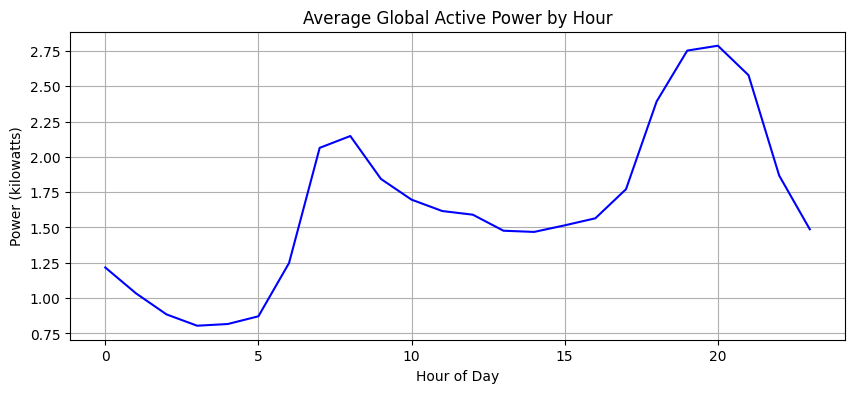

In [12]:
# 1. Pattern: Avg power usage by hour
plt.figure(figsize=(10, 4))
df.groupby('Hour')['Global_active_power'].mean().plot(kind='line', color='blue')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Power (kilowatts)')
plt.grid(True)
plt.show()

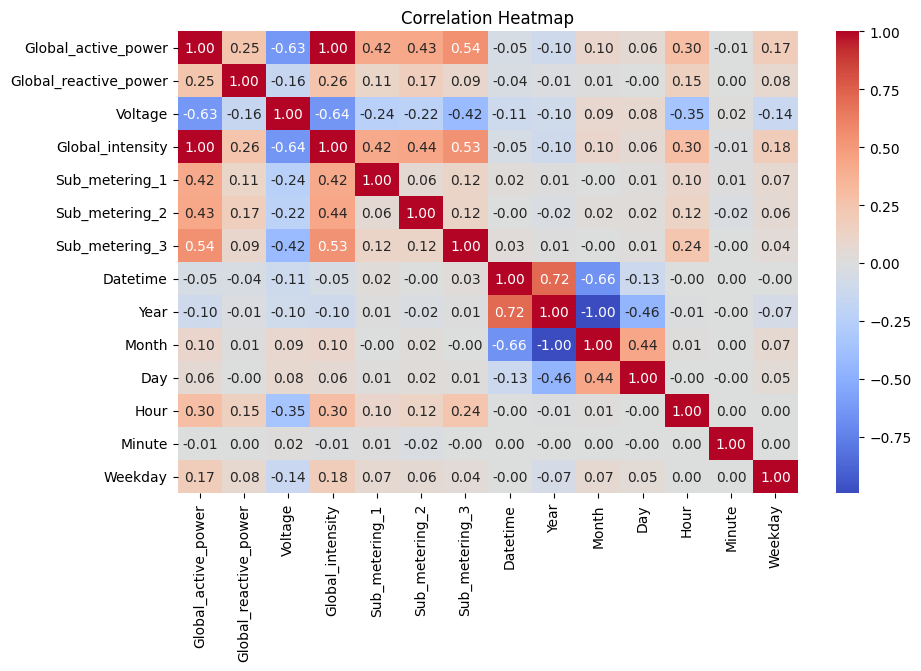

In [13]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


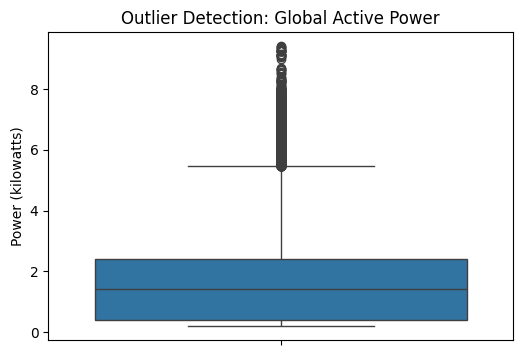

In [14]:
# 3. Outliers: Boxplot for Global Active Power
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Global_active_power'])
plt.title('Outlier Detection: Global Active Power')
plt.ylabel('Power (kilowatts)')
plt.show()

In [15]:
#   Is_Peak_Hour (1 if hour is 6 PM to 10 PM, else 0)
df['Is_Peak_Hour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [16]:
#  Daily Average Global Active Power
df['Date_only'] = df['Datetime'].dt.date
df['Daily_avg_power'] = df.groupby('Date_only')['Global_active_power'].transform('mean')

In [17]:
#  Rolling Average (3-row window)
df['Rolling_avg_power'] = df['Global_active_power'].rolling(window=3).mean().fillna(method='bfill')

C:\Users\sekhar\AppData\Local\Temp\ipykernel_9024\1018679004.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Rolling_avg_power'] = df['Global_active_power'].rolling(window=3).mean().fillna(method='bfill')


In [18]:
#    Show new features
print(df[['Datetime', 'Hour', 'Is_Peak_Hour', 'Daily_avg_power', 'Rolling_avg_power']].head())


             Datetime  Hour  Is_Peak_Hour  Daily_avg_power  Rolling_avg_power
0 2006-12-16 17:24:00    17             0         3.053475           4.983333
1 2006-12-16 17:25:00    17             0         3.053475           4.983333
2 2006-12-16 17:26:00    17             0         3.053475           4.983333
3 2006-12-16 17:27:00    17             0         3.053475           5.374000
4 2006-12-16 17:28:00    17             0         3.053475           4.809333


In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming df already has these features created
# Select features to scale (excluding 'Datetime' and target)
features = [
    'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Hour', 'Is_Peak_Hour', 'Daily_avg_power', 'Rolling_avg_power'
]

# Target variable
target = 'Global_active_power'

# Create input and output
X = df[features]
y = df[target]

# 🔹 Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Convert back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Show first few rows
print(X_scaled_df.head())


   Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
0               2.470954 -1.726557          2.018052       -0.196663   
1               2.624555 -2.075942          2.829547       -0.196663   
2               3.153623 -2.174117          2.829547       -0.196663   
3               3.187757 -2.044180          2.829547       -0.196663   
4               3.409624 -1.484009          1.559382       -0.196663   

   Sub_metering_2  Sub_metering_3      Hour  Is_Peak_Hour  Daily_avg_power  \
0       -0.119552        1.093785  0.791017      -0.51558          2.52419   
1       -0.119552        0.978420  0.791017      -0.51558          2.52419   
2        0.011841        1.093785  0.791017      -0.51558          2.52419   
3       -0.119552        1.093785  0.791017      -0.51558          2.52419   
4       -0.119552        1.093785  0.791017      -0.51558          2.52419   

   Rolling_avg_power  
0           2.534896  
1           2.534896  
2           2.534896  
3     

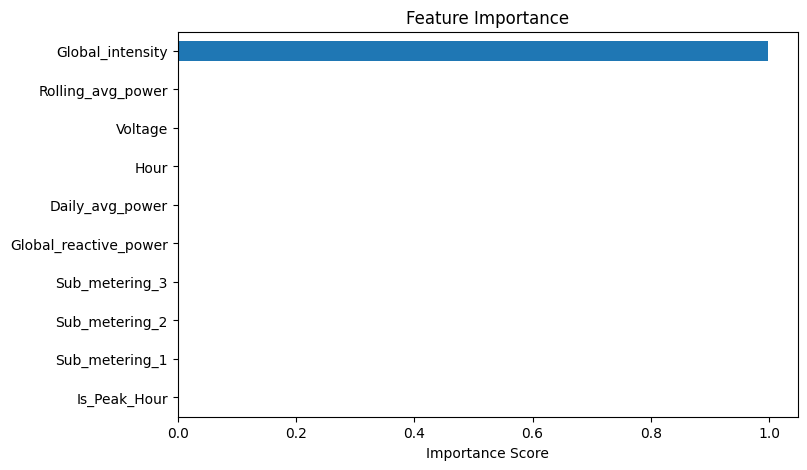

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare input and output
X = df[[
    'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Hour', 'Is_Peak_Hour', 'Daily_avg_power', 'Rolling_avg_power'
]]
y = df['Global_active_power']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5), title='Feature Importance')
plt.xlabel("Importance Score")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Assuming your final features and target are ready
# X = input features (can be scaled or unscaled)
# y = target variable (Global_active_power)

# Example: if X_scaled is used after normalization
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,        # features
    y,               # target
    test_size=0.2,   # 20% for testing
    random_state=42  # ensures repeatability
)

# Show sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80000, 10)
Testing set size: (20000, 10)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Assuming you have:
# X_train, X_test, y_train, y_test already created from previous step

#  1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

#  4. Neural Network (Multi-Layer Perceptron)
nn_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=300, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

# 1️⃣ Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("✅ Best RF Params:", rf_grid.best_params_)

# 2️⃣ Gradient Boosting Regressor
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=3, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("✅ Best GB Params:", gb_grid.best_params_)

# 3️⃣ Neural Network (MLPRegressor)
nn_params = {
    'hidden_layer_sizes': [(64,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}
nn_grid = GridSearchCV(MLPRegressor(max_iter=300, random_state=42), nn_params, cv=3, scoring='r2', n_jobs=-1)
nn_grid.fit(X_train, y_train)
print("✅ Best NN Params:", nn_grid.best_params_)


✅ Best RF Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best GB Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
✅ Best NN Params: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to evaluate a model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"🔍 {name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}\n")

# Evaluate all models
evaluate_model("Linear Regression", lr_model, X_test, y_test)
evaluate_model("Random Forest", rf_grid.best_estimator_, X_test, y_test)
evaluate_model("Gradient Boosting", gb_grid.best_estimator_, X_test, y_test)
evaluate_model("Neural Network", nn_grid.best_estimator_, X_test, y_test)


🔍 Linear Regression Performance:
  RMSE: 0.0565
  MAE : 0.0339
  R²  : 0.9982

🔍 Random Forest Performance:
  RMSE: 0.0313
  MAE : 0.0148
  R²  : 0.9995

🔍 Gradient Boosting Performance:
  RMSE: 0.0331
  MAE : 0.0186
  R²  : 0.9994

🔍 Neural Network Performance:
  RMSE: 0.0399
  MAE : 0.0253
  R²  : 0.9991



In [25]:
# Store model results in a list
model_scores = []

# Add results for each model
for name, model in [
    ("Linear Regression", lr_model),
    ("Random Forest", rf_grid.best_estimator_),
    ("Gradient Boosting", gb_grid.best_estimator_),
    ("Neural Network", nn_grid.best_estimator_)
]:
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(model_scores).sort_values(by='R2 Score', ascending=False)
print("🔎 Model Performance Comparison:\n")
print(results_df)


🔎 Model Performance Comparison:

               Model      RMSE       MAE  R2 Score
1      Random Forest  0.031346  0.014845  0.999455
2  Gradient Boosting  0.033075  0.018606  0.999393
3     Neural Network  0.039945  0.025319  0.999115
0  Linear Regression  0.056469  0.033855  0.998231


In [26]:
best_model = results_df.iloc[0]['Model']
print(f"\n✅ Best-performing model: {best_model}")



✅ Best-performing model: Random Forest
